<a href="https://colab.research.google.com/github/shreyanshrao/movie-recommendation/blob/main/movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install nltk scikit-learn numpy pandas -q

In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [5]:
import pandas as pd

df = pd.read_csv("movies.csv", nrows=5000)

print(df.shape)  # should be (5000, number_of_columns)



(5000, 3)


In [4]:
# df=pd.read_csv('movies.csv')

In [6]:
df.shape

(5000, 3)

In [7]:
df.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  5000 non-null   int64 
 1   title    5000 non-null   object
 2   genres   5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [9]:
data=df[['title','genres']]

In [10]:
data.head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [11]:
genres_text = " ".join(df['genres'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(genres_text)

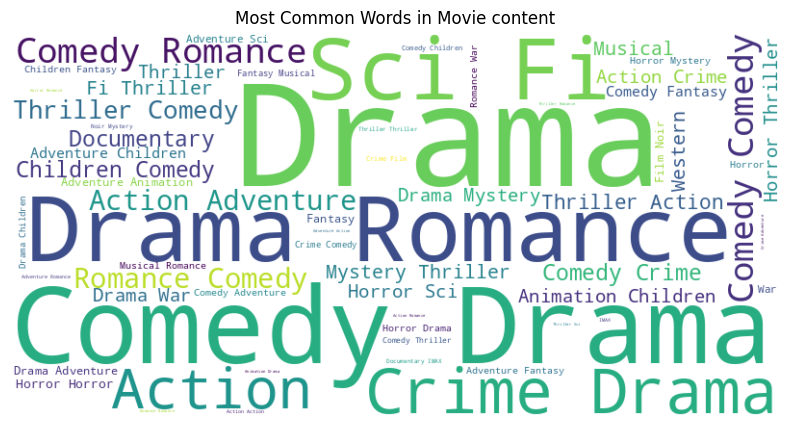

In [12]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Movie content")
plt.show()

In [13]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))


In [15]:
import re

In [16]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [17]:
data['cleaned_text'] = df['genres'].apply(preprocess_text)

In [18]:
data.head()

,title,genres,cleaned_text
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,adventureanimationchildrencomedyfantasy
1,Jumanji (1995),Adventure|Children|Fantasy,adventurechildrenfantasy
2,Grumpier Old Men (1995),Comedy|Romance,comedyromance
3,Waiting to Exhale (1995),Comedy|Drama|Romance,comedydramaromance
4,Father of the Bride Part II (1995),Comedy,comedy


In [19]:

# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [20]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [21]:

print(cosine_sim[1])

[0. 1. 0. ... 0. 0. 0.]


In [22]:

# Recommendation Function
def recommend_movies(movie_name, cosine_sim=cosine_sim, df=data, top_n=5):
    # Find the index of the movie
    idx = df[df['title'].str.lower() == movie_name.lower()].index
    if len(idx) == 0:
        return "Movie not found in the dataset!"
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return top n similar movies
    return df[['title']].iloc[movie_indices]

In [23]:

data["title"]

,title
0,Toy Story (1995)
1,Jumanji (1995)
2,Grumpier Old Men (1995)
3,Waiting to Exhale (1995)
4,Father of the Bride Part II (1995)
...,...
4995,Richard Pryor Here and Now (1983)
4996,Rookie of the Year (1993)
4997,"Sandlot, The (1993)"
4998,Cows (Vacas) (1991)


In [24]:

# row_index = df[df['title'] == "Avengers: Age of Ultron"].index
row_index = df[df['title'] == "Batman v Superman: Dawn of Justice"].index
print(row_index)

Index([], dtype='int64')


In [25]:

movie_name = data["title"][9]
print(movie_name)


GoldenEye (1995)


In [26]:
print(f"Recommendations for the Movie {movie_name}")
recommendations = recommend_movies(movie_name)
print(recommendations)

Recommendations for the Movie GoldenEye (1995)
                         title
93         Broken Arrow (1996)
429         Cliffhanger (1993)
489  Executive Decision (1996)
541  Surviving the Game (1994)
718           Rock, The (1996)
